# Probability and Sampling

## 1. Sampling Basketball Players


This exercise uses salary data and game statistics for basketball players from the 2014-2015 NBA season. The data were collected from [basketball-reference](http://www.basketball-reference.com) and [spotrac](http://www.spotrac.com).

Run the next cell to load the two datasets.

In [17]:
player_data = Table.read_table('player_data.csv')
salary_data = Table.read_table('salary_data.csv')
player_data.show(3)
salary_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


**Question 1.** We would like to relate players' game statistics to their salaries.  Compute a table called `full_data` that includes one row for each player who is listed in both `player_data` and `salary_data`.  It should include all the columns from `player_data` and `salary_data`, except the `"PlayerName"` column.

In [18]:
sorted_salary = salary_data.sort(0)
full_data = player_data.sort(0).with_columns("Salary", sorted_salary.column(1))
full_data

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
A.J. Price,28,TOT,26,32,46,7,0,14,133,62552
Aaron Brooks,30,CHI,82,166,261,54,15,157,954,1145685
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040
Adreian Payne,23,TOT,32,162,30,19,9,44,213,1855320
Al Horford,28,ATL,76,544,244,68,98,100,1156,12000000
Al Jefferson,30,CHO,65,548,113,47,84,68,1082,13666667
Al-Farouq Aminu,24,DAL,74,342,59,70,62,55,412,1100602
Alan Anderson,32,BRK,74,204,83,56,5,60,545,1276061
Alec Burks,23,UTA,27,114,82,17,5,52,374,3034356
Alex Kirk,23,CLE,5,1,1,0,0,0,4,507336


In [19]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Basketball team managers would like to hire players who perform well but don't command high salaries.  From this perspective, a very crude measure of a player's *value* to their team is the number of points the player scored in a season for every **\$1000 of salary** (*Note*: the `Salary` column is in dollars, not thousands of dollars). For example, Al Horford scored 1156 points and has a salary of 12,000 thousands of dollars, so his value is $\frac{1156}{12000}$.

**Question 2.** Create a table called `full_data_with_value` that's a copy of `full_data`, with an extra column called `"Value"` containing each player's value (according to our crude measure).  Then make a histogram of players' values.  **Specify bins that make the histogram informative, and don't forget your units!**

Hint: Informative histograms contain a majority of the data and exclude outliers.

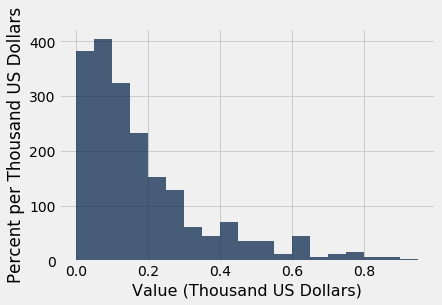

In [20]:
full_data_with_value = full_data.with_column("Value", full_data.column(9)/(full_data.column(10)/1000))
full_data_with_value.hist("Value", bins=np.arange(0,1,0.05),unit="Thousand US Dollars")

Now suppose we weren't able to find out every player's salary.  (Perhaps it was too costly to interview each player.)  Instead, we have gathered a *simple random sample* of 100 players' salaries.  The cell below loads those data.

In [21]:
sample_salary_data = Table.read_table("sample_salary_data.csv")
sample_salary_data.show(3)

PlayerName,Salary
C.J. Watson,2106720
Taj Gibson,8000000
Jerrelle Benimon,35000


**Question 3.** Make a histogram of the values of the players in `sample_salary_data`, using the same method for measuring value we used in question 2.  **Use the same bins, too.**  *Hint:* This will take several steps.

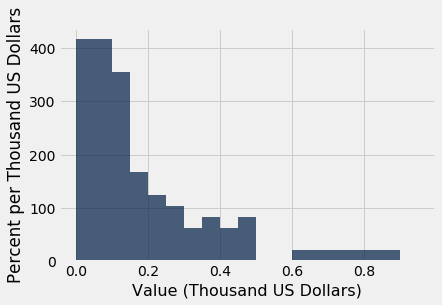

In [22]:
names = sample_salary_data.column(0)
sample_salary_table = full_data_with_value.where("Name", are.equal_to(names))
sample_salary_table.hist("Value", bins=np.arange(0,1,0.05),unit="Thousand US Dollars")

Now let us summarize what we have seen.  To guide you, we have written most of the summary already.

**Question 4.** Complete the statements below by filling in the [SQUARE BRACKETS]:

The plot in question 2 displayed a(n) probability histogram of the population of all (492) NBA players.  The areas of the bars in the plot sum to 1.

The plot in question 3 displayed a(n) empirical histogram of the sample of 100 NBA players.  The areas of the bars in the plot sum to 1.

**Question 5.** For which range of values does the plot in question 3 better depict the distribution of the **population's player values**: 0 to 0.5, or above 0.5? 

The plot in question 3 better depicts the distribution of the population's player values the best from 0 to 0.5. Question 3's plot follows the shape of question 2's plot very closely from 0 to 0.5, whereas it does not provide an accurate depiction of the population's player values above 0.5

## 2. How Many Devices?


When a company produces medical devices, it must be sure that its devices will not fail.  Sampling is used ubiquitously in the medical device industry to test how well devices work.

Suppose you work at a company that produces syringes, and you are responsible for ensuring the syringes work well.  After studying the manufacturing process for the syringes, you have a hunch that they have a 1% failure rate.  That is, you suspect that 1% of the syringes won't work when a doctor uses them to inject a patient with medicine.

To test your hunch, you would like to find at least one faulty syringe.  You hire an expert consultant who can test a syringe to check whether it is faulty.  But the expert's time is expensive, so you need to avoid checking more syringes than you need to.

**Important note:** This exercise asks you to compute numbers that are related to probabilities.  For all questions, you can calculate your answer using algebra, **or** you can write and run a simulation to compute an approximately-correct answer.  (For practice, we suggest trying both.)  An answer based on an appropriate simulation will receive full credit.  If you simulate, use at least **5,000** trials.

**Question 1.** Suppose there is indeed a 1% failure rate among all syringes.  If you check 20 syringes chosen at random from among all syringes, what is the chance that you find at least 1 faulty syringe?  (You may assume that syringes are chosen with replacement from a population in which 1% of syringes are faulty.)  Name your answer `chance_to_find_syringe`.

In [23]:
# For your convenience, we have created a list containing
# 99 copies of the number 0 (to represent good syringes)
# and 1 copy of the number 1 (to represent a bad syringe).
# This may be useful if you run a simulation.  Feel free
# to delete it.
chance_to_find_syringe = 1-(((0.99)**20)*(0.01)**0)
chance_to_find_syringe


0.18209306240276923

In [24]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Continue to assume that there really is a 1% failure rate.  Find the smallest number of syringes you can check so that you have at least a 50% chance of finding a faulty syringe.  (Your answer should be an integer.)  Name that number `num_required_for_50_percent`.  **It's okay if your answer is off by as many as 11 for full credit.**

In [25]:
def fault_finder(number):
    return 1-(((0.99)**number)*(0.01)**0)

result = []
i = 1
while i <= 100:
    if fault_finder(i) >= 0.5:
        result.append(i)
        i += 1
    else:
        i += 1

num_required_for_50_percent = min(result)
num_required_for_50_percent

69

In [26]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** A doctor purchased 5 syringes and found 4 of them to be faulty. Assuming that there is indeed a 1% failure rate, what was the probability of **exactly 4** out of 5 syringes being faulty? 

In [27]:
probability_of_four_faulty = 5*((0.01)**4)*(0.99)**1
probability_of_four_faulty 

4.95e-08

In [28]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Assuming that there is indeed a 1% failure rate, assign `order` to a **list** of the numbers 1 through 7, ordered by the size of the quantities described below from smallest to largest. For example, `order` will start with 2 because list item 2 ("Zero") is the smallest quantity.

1. One half
1. Zero
1. The chance that **zero** out of 5 syringes are faulty.
1. The chance that **at least 1** out of 5 syringes is faulty.
1. The chance that **exactly 4** out of 5 syringes are faulty.
1. The chance that **at least 4** out of 5 syringes are faulty.
1. The chance that **all 5** out of 5 syringes are faulty.

In [29]:
order = [2, 7, 5, 6, 4, 1, 3]

In [30]:
_ = ok.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



.

.

.